In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

with open("df_master_copy.pkl", 'rb') as picklefile: 
    df_master = pickle.load(picklefile)
df_master.head()

,actors,directors,dom_gross,genre,mpaa_rating,opening_release,opening_we_gross,producers,release_date,runtime,...,actor_cum_dom_roi,director_cum_oscar_noms,director_cum_oscars,director_cum_dom_roi,producer_cum_oscar_noms,producer_cum_oscars,producer_cum_dom_roi,writer_cum_oscar_noms,writer_cum_oscars,writer_cum_dom_roi
0,"[Liam Neeson, Bradley Cooper, Sharlto Copley, ...",[Joe Carnahan],77222099.0,Action,PG-13,3535.0,25669455.0,"[Ridley Scott, Tony Scott, Alex Young]",2010-06-11,117.0,...,2.00038,0.0,0.0,0.887892,5.333333,1.666667,-0.052432,0.0,0.0,0.169079
1,NaN,NaN,4264983.0,Drama,Unrated,302.0,2190042.0,NaN,2016-10-28,158.0,...,NaN,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,0.0,NaN
2,NaN,NaN,930211.0,Musical,PG-13,4.0,83743.0,NaN,1986-04-18,108.0,...,NaN,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,0.0,NaN
3,"[Paul Newman, Sally Field]",[Sydney Pollack],40716963.0,Drama / Thriller,PG,2.0,97667.0,[Sydney Pollack],1981-11-20,116.0,...,NaN,0.0,0.0,NaN,1.000000,0.000000,NaN,0.0,0.0,NaN
4,NaN,NaN,1031.0,Thriller,Unrated,NaN,NaN,NaN,2013-07-05,82.0,...,NaN,0.0,0.0,NaN,0.000000,0.000000,NaN,0.0,0.0,NaN


In [2]:
df_master.columns

Index(['actors', 'directors', 'dom_gross', 'genre', 'mpaa_rating',
       'opening_release', 'opening_we_gross', 'producers', 'release_date',
       'runtime', 'studio', 'theatrical_run', 'title', 'widest_release',
       'writers', 'ww_gross', 'oscar_noms', 'oscars', 'release_decade',
       'imdb_rating', 'imdb_num_votes', 'final_budget', 'dom_roi',
       'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi',
       'director_cum_oscar_noms', 'director_cum_oscars',
       'director_cum_dom_roi', 'producer_cum_oscar_noms',
       'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms',
       'writer_cum_oscars', 'writer_cum_dom_roi'],
      dtype='object')

In [3]:
df_reduced = df_master[['dom_gross', 'opening_release', 'opening_we_gross', 'imdb_rating', 'final_budget', \
                        'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi', 'director_cum_oscar_noms', \
                        'director_cum_oscars', 'director_cum_dom_roi', 'producer_cum_oscar_noms', \
                        'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms', \
                        'writer_cum_oscars', 'writer_cum_dom_roi']]

In [4]:
min(df_master['release_date'])

Timestamp('1919-01-01 00:00:00')

In [5]:
df_reduced.shape

(18525, 17)

In [6]:
df_reduced = df_reduced.dropna()

In [7]:
df_reduced.shape

(789, 17)

In [8]:
df_reduced.count()

dom_gross                  789
opening_release            789
opening_we_gross           789
imdb_rating                789
final_budget               789
actor_cum_oscar_noms       789
actor_cum_oscars           789
actor_cum_dom_roi          789
director_cum_oscar_noms    789
director_cum_oscars        789
director_cum_dom_roi       789
producer_cum_oscar_noms    789
producer_cum_oscars        789
producer_cum_dom_roi       789
writer_cum_oscar_noms      789
writer_cum_oscars          789
writer_cum_dom_roi         789
dtype: int64

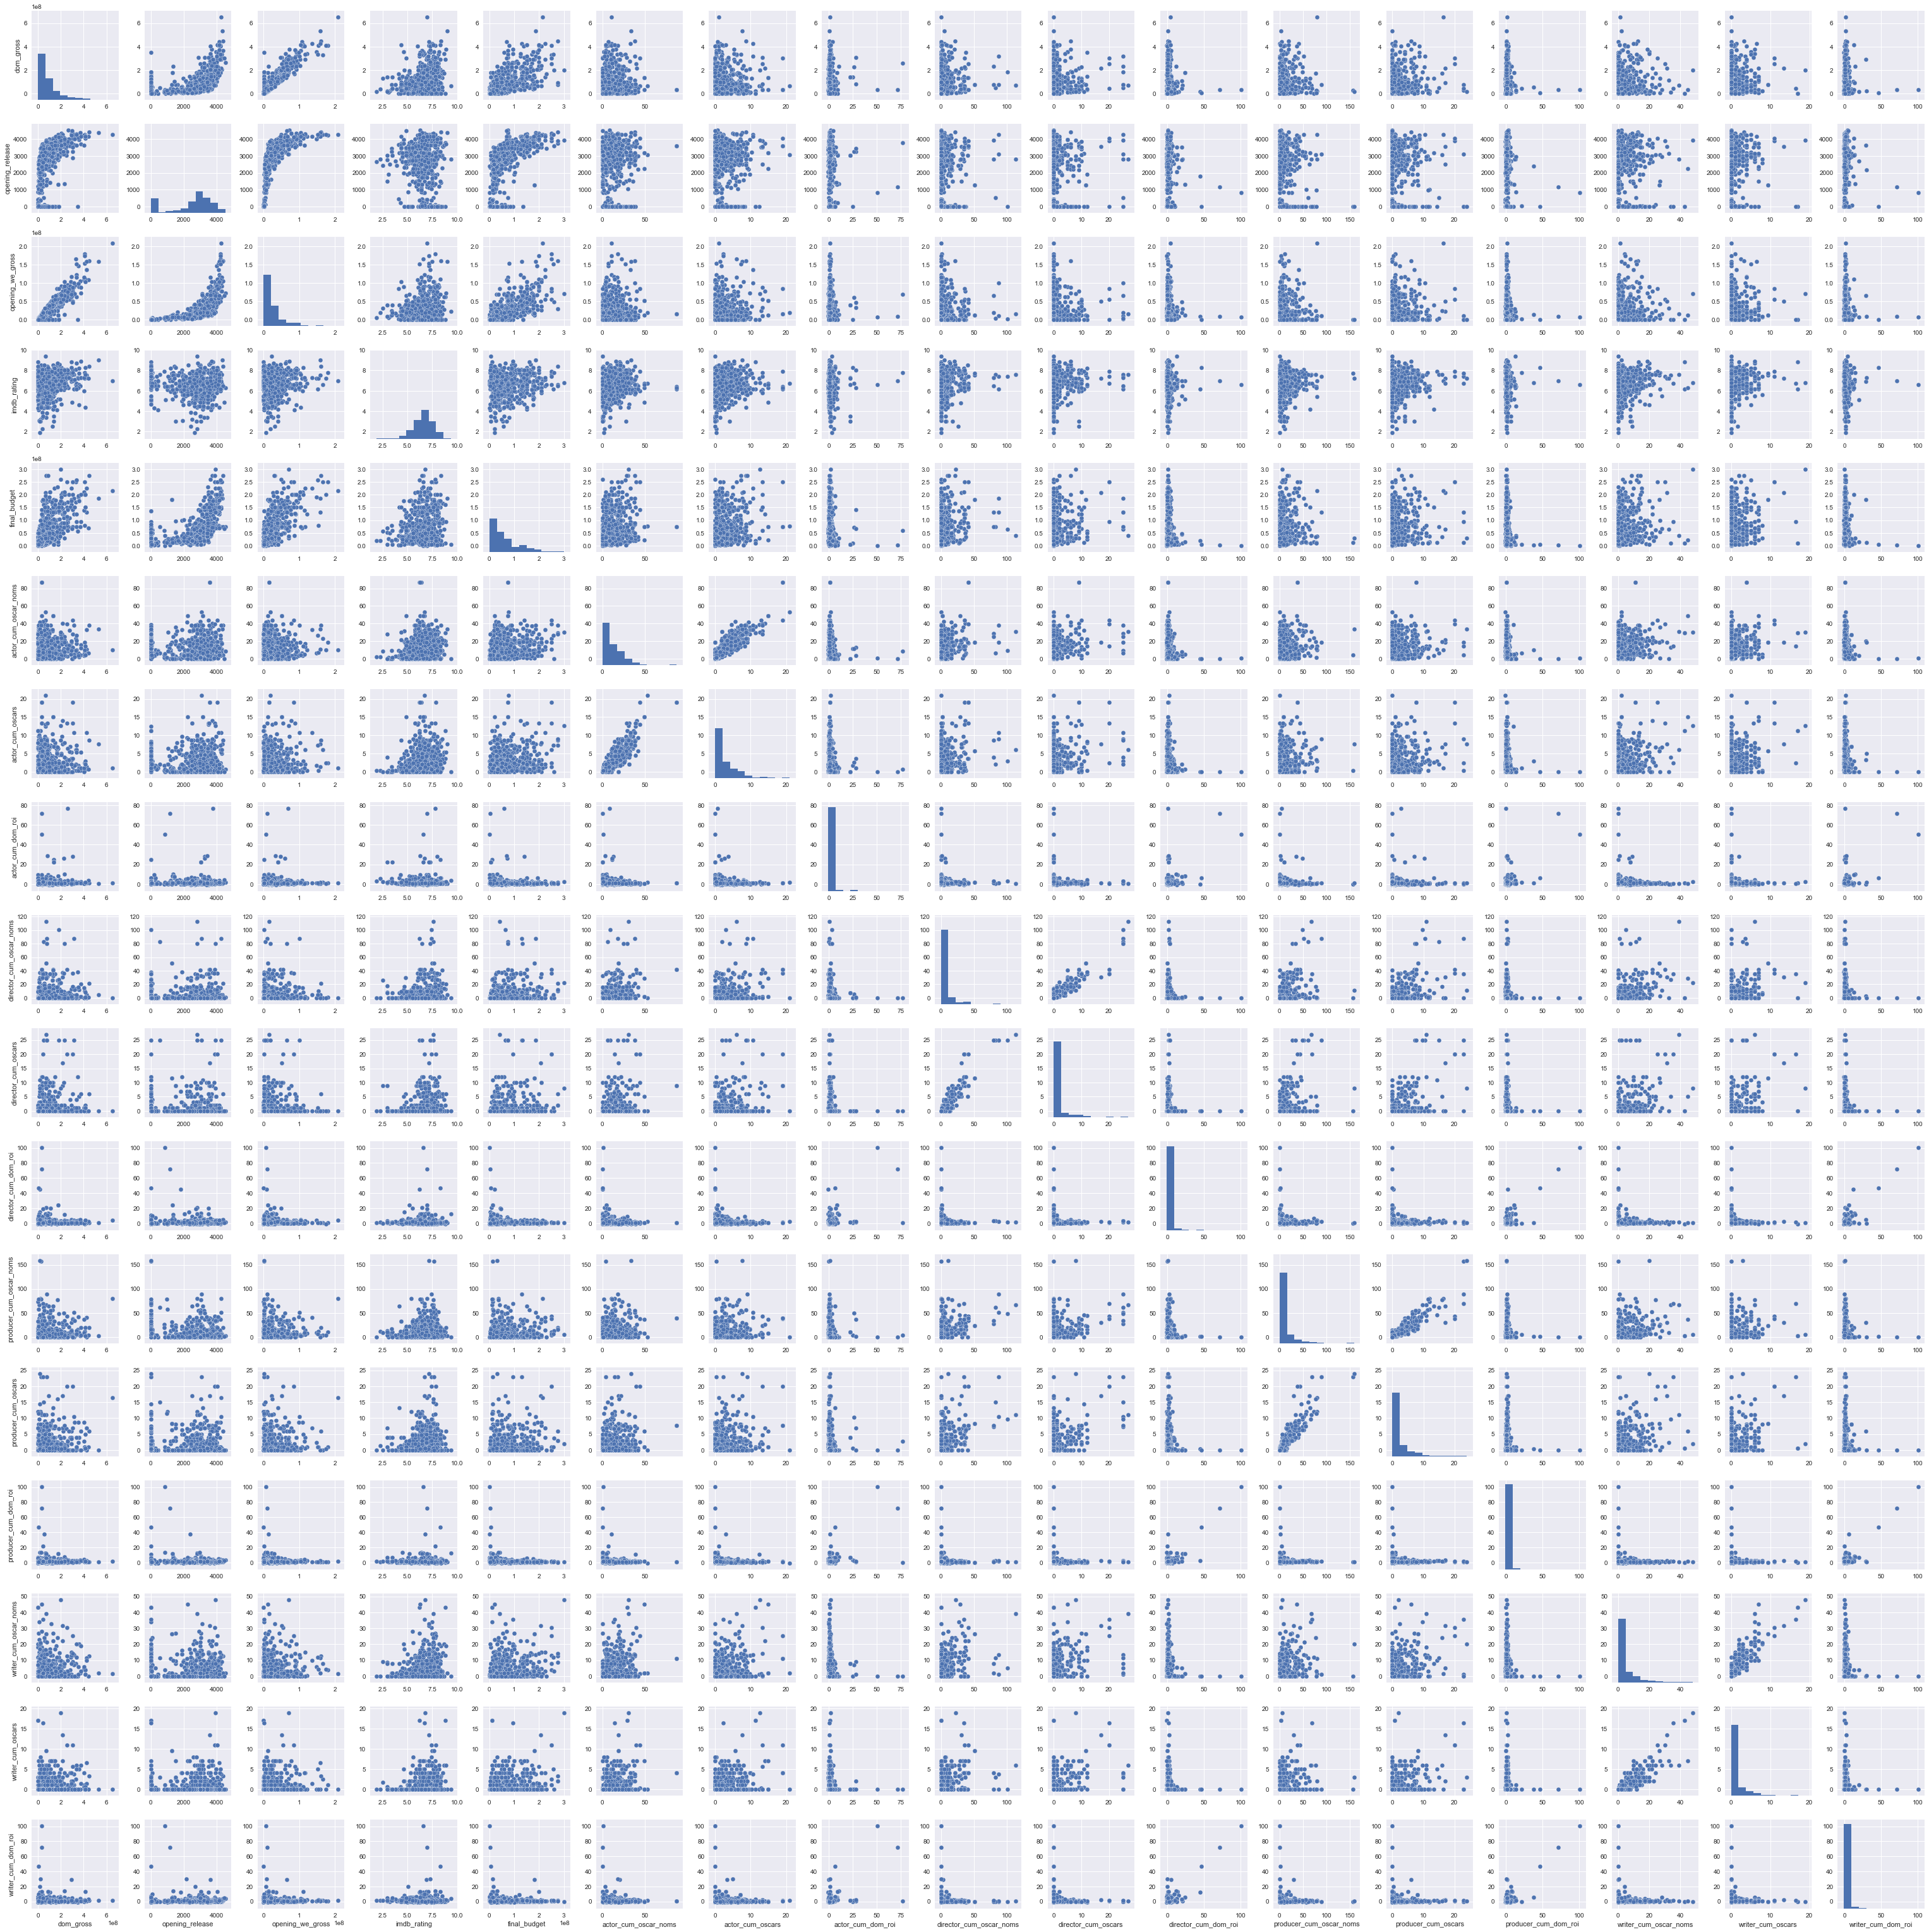

In [9]:
sns.pairplot(df_reduced);

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
X = df_reduced[['opening_release', 'opening_we_gross', 'imdb_rating', 'final_budget', \
                'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi', 'director_cum_oscar_noms', \
                'director_cum_oscars', 'director_cum_dom_roi', 'producer_cum_oscar_noms', \
                'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms', \
                'writer_cum_oscars', 'writer_cum_dom_roi']]
y = df_reduced['dom_gross']

In [12]:
lr = LinearRegression()
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
    predictions = lr.predict(X_test)
    resid = y_test - predictions
scores

[0.83190199909913998,
 0.87938563588474339,
 0.84389315069237836,
 0.83140243472270381,
 0.8390029915338002,
 0.82494608135275582,
 0.90630616722208646,
 0.86072866294299588,
 0.86908054451271266,
 0.78563797720455164]

In [13]:
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefs'])
coef_df

,Coefs
opening_release,-2.495733e+03
opening_we_gross,2.785293e+00
imdb_rating,1.068042e+07
final_budget,7.202661e-02
actor_cum_oscar_noms,-6.732807e+04
actor_cum_oscars,-1.768887e+06
actor_cum_dom_roi,1.890183e+06
director_cum_oscar_noms,1.105102e+05
director_cum_oscars,1.836817e+06
director_cum_dom_roi,-1.066030e+06


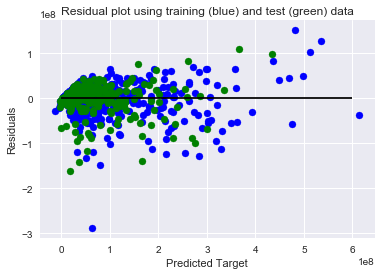

In [14]:
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c='b')
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c='g')
plt.hlines(y=0, xmin=0, xmax=600000000)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('Predicted Target');

With this in mind let's try to find a baseline

## Domestic Gross from Budget: A Baseline

In [15]:
df_baseline = df_master[['dom_gross', 'final_budget']]

In [16]:
df_baseline = df_baseline.dropna()
df_baseline.shape

(4478, 2)

In [17]:
X = df_baseline[['final_budget']]
y = df_baseline[['dom_gross']]

lr = LinearRegression()
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
np.mean(scores)

0.44796911402449513

In [18]:
coef_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefs'])
coef_df

,Coefs
final_budget,1.035088


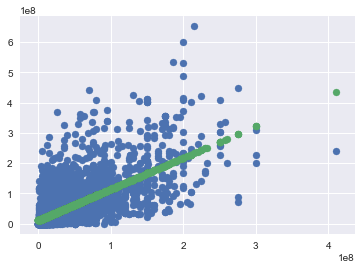

In [19]:
plt.scatter(X.final_budget, y.dom_gross)
plt.scatter(X.final_budget, lr.predict(X));

## This looks like it could be better fit with X^2

In [20]:
X['budget_sq'] = np.square(X.final_budget)

In [21]:
lr2 = LinearRegression()
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr2.fit(X_train, y_train)
    scores.append(lr2.score(X_test, y_test))
np.mean(scores)

0.42545537324478061

In [22]:
list(X.columns)

['final_budget', 'budget_sq']

In [23]:
coef_df1 = pd.DataFrame(lr2.coef_[0], index=X.columns, columns=['Coefs'])
coef_df1

,Coefs
final_budget,1.165607e+00
budget_sq,-7.553515e-10


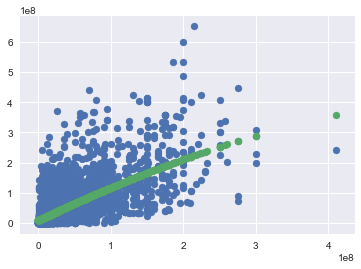

In [24]:
plt.scatter(X.final_budget, y.dom_gross)
plt.scatter(X.final_budget, lr2.predict(X));

Not really much gain here let's move on to adding some features

## Adding Numerical Variables

In [25]:
df_numericals = df_master[['dom_gross', 'imdb_rating', 'final_budget', 'actor_cum_oscar_noms', 'actor_cum_oscars', 'actor_cum_dom_roi', 'director_cum_oscar_noms', \
                           'director_cum_oscars', 'director_cum_dom_roi', 'producer_cum_oscar_noms', \
                           'producer_cum_oscars', 'producer_cum_dom_roi', 'writer_cum_oscar_noms', \
                           'writer_cum_oscars', 'writer_cum_dom_roi']]

In [26]:
df_numericals = df_numericals.dropna()
df_numericals.shape

(789, 15)

In [27]:
X_numericals = df_numericals.iloc[:,1:]

In [28]:
y_numericals = df_numericals.iloc[:,0]

In [29]:
lr3 = LinearRegression()
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_numericals, y_numericals, test_size=0.3)
    lr3.fit(X_train, y_train)
    scores.append((lr3.score(X_test, y_test), (lr3.score(X_train, y_train))))
scores

[(0.39964258538312702, 0.51094223126295546),
 (0.47221322130682042, 0.49286348730352414),
 (0.56277758054385807, 0.45342030089786067),
 (0.399100962885646, 0.50482130420809068),
 (0.47238694771510714, 0.49030362805604233),
 (0.29191288687193084, 0.55022715025535929),
 (0.3839013507761625, 0.5146950481044501),
 (0.32014329911841988, 0.5041063635429428),
 (0.47080579175210735, 0.48727775900628689),
 (0.4404521609426908, 0.50701819345986754)]

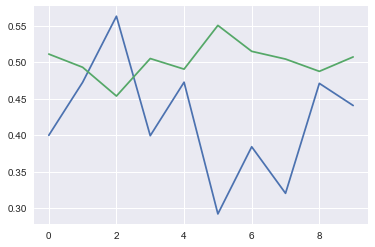

In [30]:
plt.plot(scores)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV

In [75]:
lr3 = LinearRegression()
scores3 = []
X2 = PolynomialFeatures().fit_transform(X_numericals)
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X2, y_numericals, test_size=0.3)
    lr3.fit(X_train, y_train)
    scores3.append((lr3.score(X_test, y_test), (lr3.score(X_train, y_train))))
scores3

[(0.045570127355490479, 0.65124062666204408),
 (-1.1421433716872462, 0.55950832911468895),
 (-1.5110430227535898, 0.65774577420344604),
 (-1.0818690987132746, 0.5993360287848799),
 (0.24234000756899832, 0.63940790262504754),
 (0.1261968150832864, 0.59390770981005925),
 (0.43232041390721787, 0.55013123036046829),
 (0.056589268082030353, 0.61908117307601995),
 (-0.071784532580927651, 0.6506497385789104),
 (-0.13622954492921258, 0.64080016170752752)]

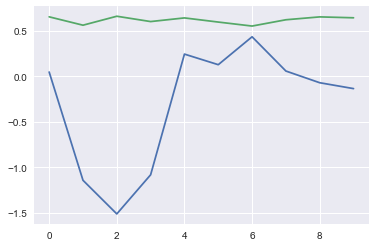

In [76]:
plt.plot(scores3);

In [77]:
lr4 = LassoCV(normalize=True)
scores = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X2, y_numericals, test_size=0.3)
    lr4.fit(X_train, y_train)
    scores.append((lr4.score(X_test, y_test), (lr4.score(X_train, y_train))))
scores

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: 

[(0.34584454083946725, 0.43417321001758824),
 (0.4903767862075834, 0.56685267815428619),
 (0.53640311337903646, 0.52948189324793704),
 (0.50675692759292013, 0.56731166078651207),
 (0.44294839891820892, 0.58332879427063422),
 (0.43250997810103764, 0.48263531941385884),
 (0.51144229813833764, 0.49263711548618938),
 (0.48572671588295746, 0.50013766944095339),
 (0.51622689314307957, 0.54818134067033419),
 (0.56141031302056155, 0.52692656113644221)]

In [80]:
lr4.alpha_

142876.56941701774

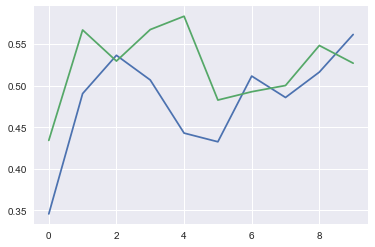

In [78]:
plt.plot(scores);

In [38]:
PolynomialFeatures().fit(X_numericals).get_feature_names(X_numericals.columns)

['1',
 'imdb_rating',
 'final_budget',
 'actor_cum_oscar_noms',
 'actor_cum_oscars',
 'actor_cum_dom_roi',
 'director_cum_oscar_noms',
 'director_cum_oscars',
 'director_cum_dom_roi',
 'producer_cum_oscar_noms',
 'producer_cum_oscars',
 'producer_cum_dom_roi',
 'writer_cum_oscar_noms',
 'writer_cum_oscars',
 'writer_cum_dom_roi',
 'imdb_rating^2',
 'imdb_rating final_budget',
 'imdb_rating actor_cum_oscar_noms',
 'imdb_rating actor_cum_oscars',
 'imdb_rating actor_cum_dom_roi',
 'imdb_rating director_cum_oscar_noms',
 'imdb_rating director_cum_oscars',
 'imdb_rating director_cum_dom_roi',
 'imdb_rating producer_cum_oscar_noms',
 'imdb_rating producer_cum_oscars',
 'imdb_rating producer_cum_dom_roi',
 'imdb_rating writer_cum_oscar_noms',
 'imdb_rating writer_cum_oscars',
 'imdb_rating writer_cum_dom_roi',
 'final_budget^2',
 'final_budget actor_cum_oscar_noms',
 'final_budget actor_cum_oscars',
 'final_budget actor_cum_dom_roi',
 'final_budget director_cum_oscar_noms',
 'final_budget di

In [39]:
coef_df3 = pd.DataFrame(lr4.coef_, index=PolynomialFeatures().fit(X_numericals).get_feature_names(X_numericals.columns), columns=['Coefs'])
coef_df3[coef_df3['Coefs'] != 0].sort_values('Coefs', ascending=False)

,Coefs
imdb_rating^2,5.733725e+05
actor_cum_dom_roi writer_cum_oscar_noms,3.087157e+05
final_budget producer_cum_dom_roi,1.337961e-01
final_budget director_cum_dom_roi,1.304112e-01
imdb_rating final_budget,1.201354e-01
final_budget actor_cum_dom_roi,3.782103e-02
final_budget producer_cum_oscar_noms,1.444071e-03
final_budget actor_cum_oscars,-5.559616e-03
director_cum_oscars producer_cum_oscars,-4.169952e+04
writer_cum_oscars^2,-4.662014e+04


## Predicting Oscar Noms

In [50]:
df_oscars = df_master[['release_date', 'title', 'oscar_noms', 'opening_release', 'opening_we_gross',\
                       'dom_gross', 'imdb_rating', \
                       'actor_cum_oscar_noms', 'actor_cum_oscars', \
                       'director_cum_oscar_noms', 'director_cum_oscars',\
                       'producer_cum_oscar_noms', 'producer_cum_oscars', \
                       'writer_cum_oscar_noms', 'writer_cum_oscars']]

In [51]:
df_oscars = df_oscars.dropna()

In [52]:
df_oscars['release_year'] = df_oscars['release_date'].apply(lambda x : x.year)

In [53]:
df_oscars_valid = df_oscars[df_oscars.release_year == 2017]
df_oscars_valid = df_oscars_valid.drop('release_year', axis=1)
df_valid_titles = df_oscars_valid[['title', 'oscar_noms']]
df_oscars_valid.shape

(607, 15)

In [54]:
df_valid_titles.head()

,title,oscar_noms
7,Abracadabra,0.0
38,Abacus: Small Enough to Jail,1.0
101,After the Storm,0.0
108,After Love,0.0
109,After Love,0.0


In [55]:
df_oscars_tt = df_oscars[df_oscars.release_year < 2017]

In [56]:
X_oscars = df_oscars_tt[['opening_release', 'opening_we_gross',\
                       'dom_gross', 'imdb_rating', \
                       'actor_cum_oscar_noms', 'actor_cum_oscars', \
                       'director_cum_oscar_noms', 'director_cum_oscars',\
                       'producer_cum_oscar_noms', 'producer_cum_oscars', \
                       'writer_cum_oscar_noms', 'writer_cum_oscars']]
X_oscars.head()

,opening_release,opening_we_gross,dom_gross,imdb_rating,actor_cum_oscar_noms,actor_cum_oscars,director_cum_oscar_noms,director_cum_oscars,producer_cum_oscar_noms,producer_cum_oscars,writer_cum_oscar_noms,writer_cum_oscars
0,3535.0,25669455.0,77222099.0,6.8,18.333333,3.333333,0.0,0.0,5.333333,1.666667,0.0,0.0
1,302.0,2190042.0,4264983.0,5.8,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,4.0,83743.0,930211.0,5.6,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,2.0,97667.0,40716963.0,6.9,0.500000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0
6,3108.0,16306974.0,37519139.0,5.9,8.666667,4.000000,6.0,0.0,3.333333,0.666667,1.0,0.0


In [57]:
y_oscars = df_oscars_tt[['oscar_noms']]

In [61]:
X5 = PolynomialFeatures().fit_transform(X_oscars)
lr5 = LassoCV(normalize=True)
scores5 = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X5, y_oscars, test_size=0.3)
    lr5.fit(X_train, y_train)
    scores5.append((lr5.score(X_test, y_test), (lr5.score(X_train, y_train))))
scores5

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/maliksalam/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWar

[(0.43451589599282781, 0.48588557324661152),
 (0.42805208046333737, 0.48771229691935364),
 (0.42505540804261988, 0.45375193275819564),
 (0.46350808791720677, 0.44615257316166557),
 (0.42408895041622863, 0.43580534163773793),
 (0.41799433645478445, 0.4764038727676726),
 (0.45884552185447469, 0.47247038878468867),
 (0.37267407778707529, 0.5140095486339944),
 (0.40125253715574949, 0.41501417122772261),
 (0.40181126827115915, 0.4954569323730843)]

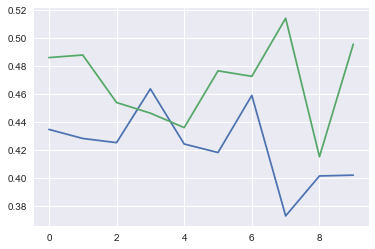

In [62]:
plt.plot(scores5);

In [63]:
coef_df5 = pd.DataFrame(lr5.coef_, index=PolynomialFeatures().fit(X_oscars).get_feature_names(X_oscars.columns), columns=['Coefs'])
coef_df5[coef_df5['Coefs'] != 0].sort_values('Coefs', ascending=False)

,Coefs
imdb_rating^2,3.961453e-02
imdb_rating director_cum_oscar_noms,6.387218e-03
imdb_rating director_cum_oscars,6.318190e-03
writer_cum_oscars^2,4.286008e-03
director_cum_oscars writer_cum_oscar_noms,2.870583e-03
imdb_rating producer_cum_oscar_noms,2.171318e-03
imdb_rating actor_cum_oscar_noms,1.343087e-03
imdb_rating producer_cum_oscars,1.246682e-03
imdb_rating writer_cum_oscar_noms,9.274636e-04
actor_cum_oscar_noms writer_cum_oscar_noms,5.627536e-04


In [64]:
X_valid = df_oscars_valid[['opening_release', 'opening_we_gross',\
                       'dom_gross', 'imdb_rating', \
                       'actor_cum_oscar_noms', 'actor_cum_oscars', \
                       'director_cum_oscar_noms', 'director_cum_oscars',\
                       'producer_cum_oscar_noms', 'producer_cum_oscars', \
                       'writer_cum_oscar_noms', 'writer_cum_oscars']]

X_valid_pol = PolynomialFeatures().fit_transform(X_valid)


df_valid_titles['predictions'] = lr5.predict(X_valid_pol)

/Users/maliksalam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
display_validation = df_valid_titles.sort_values(by='predictions', ascending = False).drop_duplicates('title')

In [66]:
display_validation[display_validation['predictions']>1]

,title,oscar_noms,predictions
16164,Star Wars: The Last Jedi,4.0,4.326115
4752,Dunkirk,8.0,3.980012
3617,Coco,2.0,3.282210
17832,Wind River,0.0,2.477237
4874,Darkest Hour,6.0,2.421379
7120,The Greatest Showman,1.0,2.393213
797,The Big Sick,1.0,2.169370
14058,The Shape of Water,13.0,2.093809
7683,Get Out,4.0,2.041696
18287,Wonder,1.0,1.982541


In [82]:
np.transpose(df_master[df_master['title'] == 'The Shape of Water'])

,14058
actors,"[Sally Hawkins, Michael Shannon, Richard Jenki..."
directors,[Guillermo del Toro]
dom_gross,3.0209e+07
genre,Fantasy Drama
mpaa_rating,R
opening_release,2
opening_we_gross,166564
producers,"[Guillermo del Toro, J. Miles Dale]"
release_date,2017-12-01 00:00:00
runtime,119


In [81]:
lr5.alpha_

2.4182276387026347e-05